# Iterators & Generators

#### Recap from Loops
We know how a `for` loop can be used to iterate through each element of a sequence like so
```python
some_nums = [5,8,9,3,1,4]
for num in some_nums:
    print(num)
```
Each iteration of the `for` loop assigns the variable `num` with a different element in from the sequence `some_nums`.

The `for` loop's **general syntax** is
```python
for var in iterable:
    statement(s)
```

We can even use loop control statements like `break`, `continue` and `pass` within the loop to alter the flow.

## Topics
* Iterators
 * Custom Classes with Iterators
 * Infinite Iterators
* Generators
 * Finite & Infinite Generators
 * `send()`
 * Generator Expressions
 * Advantages of Generators
---

## Iterators

**What is the Iterator Pattern?**<br>
> This algorithm of iterating each element of a given sequence is called an Iterator Pattern. An object that supports the Iterator Pattern is able to iterate and return each element in its container regardless on whether the object supports indexing.

`While` loops are not used with the Iterator Pattern because it only works on object that supports indexing.

The tradition Iterator pattern consists of 3 objects:

* a container object
* the container's internal logic that allows it to gather and organize the items within it
* the container uses a generic iterator object that implements exact same logic as all other kinds of containers.

Let's take a step back from the `for` loop to see how an iteration can be done manually. There are 2 functions that are important to iterators namely

* `iter()` this function takes a container object (like `list`, `dict`, `tuples`, `str`, `sets`) and builds then returns a new iterator object. It will raise a `TypeError` if the container object is not an iterable.
 > From the Python documentation:<br>
 > Sequences, **always** support the iteration methods.
* `next()` this function accepts the iterator object returned from the `iter()` function and each time it's called, it returns the next item from the container. When it hits the end, a `StopIteration` exception is raised.

**Example of a basic `list` iterator**

In [1]:
# define a list
my_list = [4, 7, 0, 3]
# get an iterator using iter()
my_iter = iter(my_list)

In [2]:
print(next(my_iter))

4


In [3]:
print(next(my_iter))

7


In [4]:
print(next(my_iter))

0


In [5]:
print(next(my_iter))

3


In [6]:
# will raise an error because there are no more elements left in the list
print(next(my_iter))

StopIteration: 

We can see from the above that a more elegant way of automatically iterating is by using the `for` loop.
```python
for element in my_list:
    print(element)
```

But if you notice, a `for` loop requires a predefined number of `next()` functions to be known therefore the iterator's true implementation is 
```python
# create an iterator object from that iterable
iter_obj = iter(iterable)

# infinite loop
while True:
    try:
        # get the next item
        element = next(iter_obj)
        # do something with element
    except StopIteration:
        # if StopIteration is raised, break from loop
        break
```

**Example: Implementation of the previous `list` iterator**

In [7]:
iter_obj = iter(my_list)

# infinite loop
while True:
    try:
        # get the next item
        element = next(iter_obj)
        print(element)
    except StopIteration:
        # if StopIteration is raised, break from loop
        break

4
7
0
3


So why do we need to separate the iterator from the container and why can we not just use a counter to keep track of the next element? 

The single counter would work if we were using 1 `for` loop per container but what happens if we require several `for` loops to work on the same container? For example, we want to generate all combinations from 2 or more 6-sided dice.

**Example: Normal code for generating all combinations of 2 6-sided dice**

In [8]:
dice = ['one', 'two', 'three', 'four', 'five', 'six']
for face_1 in dice:
    for face_2 in dice:
        print(f'first: {face_1}, second: {face_2}')

first: one, second: one
first: one, second: two
first: one, second: three
first: one, second: four
first: one, second: five
first: one, second: six
first: two, second: one
first: two, second: two
first: two, second: three
first: two, second: four
first: two, second: five
first: two, second: six
first: three, second: one
first: three, second: two
first: three, second: three
first: three, second: four
first: three, second: five
first: three, second: six
first: four, second: one
first: four, second: two
first: four, second: three
first: four, second: four
first: four, second: five
first: four, second: six
first: five, second: one
first: five, second: two
first: five, second: three
first: five, second: four
first: five, second: five
first: five, second: six
first: six, second: one
first: six, second: two
first: six, second: three
first: six, second: four
first: six, second: five
first: six, second: six


If the Python list object `dice` had tried to support iteration using **only a single internal counter**, then the inner `for` loop would have used up all of the items and left the outer `for` loop without any further items to visit. Instead, we are given a separate iterator on each call to `iter()`.

**Example: Separate iterator objects for each `iter()` call**

In [9]:
itr1 = iter(dice)
itr2 = iter(dice)

print(itr1)
print(itr2)
print(itr1 is itr2)

False


#### Custom Classes with iterators
Now that we have seen how iterators can be used manually, we shall move on to study how it can be implemented in a class. For a `class` to be an iterator, it has to implement two special methods

* `__iter__()` this function returns an iterator object.
* `__next__()` this function returns the next item in the sequence and raise a `StopIteration` exception upon reaching the end.
* In addition, if we want our object to be usable with a `for` loop, we need to add an `__iter__()` method that **returns itself**.

**Example: An class calculating Powers of 2 (aka 2<sup>x</sup>)**

In [10]:
class PowTwo:
    """Class to implement an iterator of powers of two"""
    def __init__(self, limit=0):
        print("Now in __init__")
        self.limit = limit

    def __iter__(self):
        print("Now in __iter__")
        self.n = 0
        return self

    def __next__(self):
        print("Now in __next__")
        if self.n <= self.limit:
            result = 2 ** self.n
            self.n += 1
            print(f"Take the value and increment to the next power {self.n}")
            return result
        else:
            raise StopIteration

**Manual iteration**

In [11]:
# create an object
numbers = PowTwo(3)

# create an iterable from the object
i = iter(numbers) # iter calls the __iter__() method.

Now in __init__
Now in __iter__


In [12]:
# Using next to get to the next iterator element
print(next(i))

Now in __next__
Take the value and increment to the next power 1
1


In [13]:
print(next(i))  # will result in an error 

Now in __next__
Take the value and increment to the next power 2
2


**Using `for` loop iteration**

In [14]:
for i in PowTwo(5):
    print(i) # For loop internally can detect and avoid the exception, so no error StopIterationError.

Now in __init__
Now in __iter__
Now in __next__
Take the value and increment to the next power 1
1
Now in __next__
Take the value and increment to the next power 2
2
Now in __next__
Take the value and increment to the next power 3
4
Now in __next__
Take the value and increment to the next power 4
8
Now in __next__
Take the value and increment to the next power 5
16
Now in __next__
Take the value and increment to the next power 6
32
Now in __next__


#### The PREFERRED method of implementing custom classes with iteration

We can split the **Iterator object** from the **Iterable object**. 
* An **iterable Object** like we have seen earlier is any sequence object (`list`, `tuple`, `str`, etc). We can iterate over this and this must **create** the iterator object when called by the `iter()` function.
* The **iterator object** is the object that is used to iterate over an iterable object using `__next__()` method.

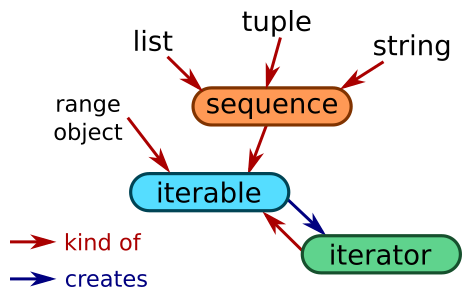

<br>

**Example: OddNum Iterable**
* The iterator object iterates through `n` number of times (`1` to `n`) each time the `__next__()` method is called.
* The iterable object is the object that creates the iterator object with the maximum limit value set.

# The iterable object is the object that creates the iterator object with the maximum limit value set.

# iter(iterable) -> iterator then iterator returns an iterable.

# Separation of Iterable and Iterator!


In [40]:
# Separation of Iterable and Iterator!

# iterable object
class OddNumIterable:
    def __init__(self, limit):
        self.limit = limit
    
    def __iter__(self):
        return OddNumIterator(self.limit)

# iterator 
class OddNumIterator:
    def __init__(self, limit):
        self.limit = limit
        self.num = 1

    def __iter__(self):
        return self

    def __next__(self):
        if self.num <= self.limit: # Remove this line then the iterator becomes an infinite iterator.
            num = self.num
            # increment next odd number
            self.num += 2
            return num
        else:
            raise StopIteration

**Manaual iteration**

In [16]:
obj = OddNumIterable(5)
iter_obj = iter(obj)

In [17]:
print(next(iter_obj))

1


**Using `for` loop iteration**

In [18]:
odds = OddNumIterable(15)
for odd in odds:
    print(odd, end=' ')

1 3 5 7 9 11 13 15 

#### Infinite Iterators

An **Infinite Iterator** that returns a theoretically infinite stream of odd numbers. <br>
An Infinite Iterator "remembers" the last number they were at so long as the iterator is still alive in memory.

The **main difference** between a normal iterator object and an infinite iterator object is the **absence** of the variable limiting the iteration.

In [19]:
# iterable object
class InfOddNumIterable:
    def __iter__(self):
        return InfOddNumIterator()

# iterator 
class InfOddNumIterator:
    def __init__(self):
        self.num = 1
        
    def __iter__(self):
        return self

    def __next__(self):
        num = self.num
        # increment next odd number
        self.num += 2
        return num

In [20]:
# iterable object
odd = iter(InfOddNumIterable())
print(next(odd))
print(next(odd))
print(next(odd))

1
3
5


In [21]:
# it can still be called from any other code cell so long as 
# the variable 'odd' is still in memory
print(next(odd))

7


The advantage of using iterators is that they **save resources**. Like in the example above theoretically, we have an infinite set of odd numbers (in finite menory) without storing the entire number system in memory .

---
## Generators

Generators makes creating iterators simpler. We have seen from the previous section on iterators that if we want to create one, we have to implement a class with `__iter__()` and `__next__()` method, keep track of internal states, and raise `StopIteration` when there are no values to be returned. This is both lengthy and counterintuitive.

Generators are a simpler way of creating iterators by automatically creating the iterator object and returning it so that we can iterate over it one value at a time.

Generators uses the `yield` statement instead of the `return` statement. The difference between the `yield` and `return` statement is:
* **`return`** - **terminates** a function completely
* **`yield`** - **pauses** the function, saving all its states and is able to resume from there on successive later calls

**Example: A simple generator**

In [22]:
# A simple generator function
def my_gen():
    n = 1
    print('This is printed first')
    # Generator function contains yield statements
    yield n

    n += 1
    print('This is printed second')
    yield n

    n += 1
    print('This is printed at last')
    yield n

In [23]:
# It returns an object but does not start execution immediately.
a = my_gen()

# We can iterate through the items using next().
next(a)

This is printed first


1

In [ ]:
# Once the function yields, the function is paused and the control is transferred to the caller.
# Local variables and theirs states are remembered between successive calls.
next(a)

In [ ]:
next(a)

In [ ]:
# Finally, when the function terminates, StopIteration is raised automatically on further calls.
next(a)

An interesting thing to note in the above example is that the value of variable `n` is **remembered** between each call. Unlike normal functions, the local variables are **not destroyed** when the function yields. Furthermore, the generator object can be iterated only once through.

So how is a generator function **different** from a normal function?
* Generator function contains one or more `yield` statements.
* When called, it returns an object (iterator) but does not start execution immediately.
* Methods like `__iter__()` and `__next__()` are implemented automatically. So we can iterate through the items using `next()`.
* Once the function yields, the function is paused and the control is transferred to the caller.
* Local variables and their states are remembered between successive calls.
* Finally, when the function terminates, `StopIteration` is raised automatically on further calls.

To restart the previous generator, we can call `my_gen()` again. Generators can also be used in a `for` loop because a `for` loop takes an iterator and iterates over it using `next()` function. It automatically ends when `StopIteration` is raised.

In [24]:
for item in my_gen():
    print(item)

This is printed first
1
This is printed second
2
This is printed at last
3


Normally, generator functions are implemented with a loop having a **suitable terminating condition**.

### Finite Generators
Generators that generates values up to a predefined value.

**Example: A generator that returns 7 random numbers between `1` and `49`** <br>

In [25]:
import random

def lottery(limit):
    # returns 7 numbers between 1 and 49
    for i in range(limit):
        yield random.randint(1, 49)

for num in lottery(7):
       print(f"And the next number is... {num}!")

And the next number is... 43!
And the next number is... 39!
And the next number is... 11!
And the next number is... 42!
And the next number is... 18!
And the next number is... 32!
And the next number is... 19!


### Infinite Generators

Like infinite iterators, there is also a version for an infinite generator. The internal states are also "remembered" so long as the generator is alive in memory.

**Example: Infinite generator that returns every multiple of 2.**

In [26]:
def mul_by_two():
    n = 0
    while True:
        yield n * 2
        n += 1

In [27]:
m = mul_by_two()

In [28]:
print(next(m))

0


**Example: Infinite generator that generates the fibonacci sequence.**

In [29]:
def inf_fibonacci():
    a, b = 1, 1
    while True:
        yield a
        a, b = b, a + b

We can use an input to limit the number of times the generator is called.

In [30]:
m = inf_fibonacci()
user_limit = int(input("Enter a limit: "))

for _ in range(user_limit):
    print(next(m), end=' ')

Enter a limit: 3
1 1 2 

In [31]:
# as the generator object is still alive in memory, we can 
# still use it in another code cell
print(next(m))

3


### `Send()`

This a special function is used to send values to generator object. Be aware of the fact that `send()` both sends a value to the generator and returns the value yielded by the generator. 

**Example: The `send()` function in action**

In [32]:
def simple_send():
    print("generator has been started!")
    while True:
        x = yield "foo"
        print("generator received: ", x)

In [33]:
ss = simple_send()

In [34]:
# used to "start" the generator
next(ss)

generator has been started!


'foo'

In [36]:
ret_value = ss.send("Hi")
print("'send' returned: ", ret_value)

generator received:  Hi
'send' returned:  foo


Caveat is that the generator needs to be started first (using the `next()` function) before the `send()` can be used otherwise and exception will be thrown.

To use the `send()` method, the generator must wait for a `yield` statement so that the data sent can be processed or assigned to the variable on the left.

**Example: A Counter application using the `send()` function**

In [37]:
def count(firstval=0, step=1):
    counter = firstval
    while True:
        new_counter_val = yield counter
        if new_counter_val is None:
            counter += step
        else:
            counter = new_counter_val

In [38]:
counter = count(2.5, 0.2)
for i in range(10):
    new_value = next(counter)
    print(f"{new_value:2.2f}", end=", ")

2.50, 2.70, 2.90, 3.10, 3.30, 3.50, 3.70, 3.90, 4.10, 4.30, 

In [41]:
print("set current count value to another value:")
print(counter.send(100.5))
for i in range(10):
    new_value = next(counter)
    print(f"{new_value:2.2f}", end=", ")

set current count value to another value:
100.5
100.70, 100.90, 101.10, 101.30, 101.50, 101.70, 101.90, 102.10, 102.30, 102.50, 

### Generator Expressions

We can even create simple generator on-the-fly using generator expressions. Similar to the `lambda` functions which create anonymous functions, generator expressions create anonymous generator functions.

The syntax for generator expression is similar to that of a list comprehension. But the square brackets (`[]`) are replaced with round parentheses (`()`). The **major difference** between a list comprehension and a generator expression is that a list comprehension produces the entire `list` while the generator expression produces one item at a time.

**Example: A list comprehension vs a generator expression**

In [ ]:
# Initialize the list
my_list = [1, 3, 6, 10]

# square each term using list comprehension
list_comp = [x**2 for x in my_list]

# same thing can be done using a generator expression
generator = (x**2 for x in my_list)

print(list_comp)
print(generator)

From the results, we can see that the generator expression did not produce the result immediately. Instead, it returned a generator object, which produces items only on demand till a `StopIteration` is thrown.

In [ ]:
print(next(generator))

Generator expressions can be used as function arguments. When used in such a way, the round parentheses can be dropped.

**Example: Using the `sum()` function with a Generator expression**

In [ ]:
sum(x**2 for x in my_list)

### Advantages of Generators
Some reasons are listed below:

1. Easy to implement. Take the `OddNumIterable` iterator object (from the Iterators section), the generator version would look like

 **Example: Generator version of the `OddNumIterable()`**

In [ ]:
def OddNumGenerator(limit):
    cnt = 1
    while cnt <= limit:
        if cnt % 2 == 1:
            yield cnt
        cnt += 1

2. More efficient on memory because normal functions will return a whole sequence of items which was created in memory before returning thus if the number of items is huge, the memory requirements is also huge.

3. Generators are excellent mediums to represent an infinite stream of data. Infinite streams cannot be stored in memory, and since generators produce only one item at a time, they can be used to represent an infinite stream of data.

4. Generators can be chained. It means that multiple generators can be chained into a series of operations. 

 **Example: Generator Chaining**

In [ ]:
# one generator to calculate the fibonacci numbers is 
# a series of numbers in which each number is the sum 
# of the two preceding numbers. 
# The simplest is the series 1, 1, 2, 3, 5, 8, etc.
def fibonacci_numbers(nums):
    x, y = 0, 1
    for not_used in range(nums):
        x, y = y, x+y
        yield x

# second generator that squares numbers
def square(nums):
    for num in nums:
        yield num**2
        
# chaining generators
for i in square(fibonacci_numbers(8)):
    print(i, end=' ')

---
## Summary

* Iterators - what are they, how they work both manually and with a `for` loop
 * Custom Classes with Iterators
 * Infinite Iterators
* Generators - what are they, how different are they from iterators
 * Finite & Infinite Generators
 * `send()`
 * Generator Expressions
 * Advantages of Generators